# 추천 모델 최적의 가중치 테스트 

In [205]:
# 라이브러리 불러오기
import os
import sys
import warnings
import pickle 

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

import pandas as pd

In [206]:
# 경고 무시
warnings.filterwarnings(action='ignore')

In [207]:
# 모델 경로 불러오기
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname(os.path.abspath(os.path.dirname('model'))))))

import model.model as md

# 모델 불러오기
model = md.recommendation()

In [208]:
# (윈도우 경로)
# 모델에서 사용할 임베딩 벡터 선언
# model.get_embedding_matrix('..\\..\\embeddings\\embedding(wiki).json', 300)

In [209]:
# (맥 경로)
# 모델에서 사용할 임베딩 벡터 선언
model.get_embedding_matrix('../../embeddings/embedding(wiki).json', 300)

In [210]:
# 관심사 리스트 불러오기
model.preferences 

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24']

In [211]:
# (윈도우 경로)
# 동일한 테스트 데이터 사용을 위해 pickle 파일 사용
# with open('..\\data\\test_li(wiki).pickle', 'rb') as j:
#     test_li = pickle.load(j)

# test_li

In [212]:
# (맥 경로)
# 동일한 테스트 데이터 사용을 위해 pickle 파일 사용
with open('../data/test_li(wiki).pickle', 'rb') as j:
    test_li = pickle.load(j)

test_li

[[0, ['13', '9', '24', '5']],
 [1, ['23', '21', '10', '7']],
 [2, ['20', '15', '10', '21']],
 [3, ['8', '9', '2', '20']],
 [4, ['19', '18', '7', '9']],
 [5, ['19', '23', '13', '22']],
 [6, ['22', '18', '11', '2']],
 [7, ['11', '4', '7', '16']],
 [8, ['11', '4', '9', '20']],
 [9, ['16', '9', '12', '18']],
 [10, ['3', '9', '10', '6']],
 [11, ['5', '14', '17', '10']],
 [12, ['7', '9', '11', '8']],
 [13, ['20', '14', '3', '18']],
 [14, ['10', '12', '7', '4']],
 [15, ['21', '23', '15', '8']],
 [16, ['24', '23', '12', '18']],
 [17, ['11', '13', '3', '17']],
 [18, ['19', '18', '6', '15']],
 [19, ['11', '24', '9', '4']],
 [20, ['1', '15', '21', '10']],
 [21, ['14', '3', '15', '10']],
 [22, ['14', '6', '7', '9']],
 [23, ['21', '1', '6', '22']],
 [24, ['24', '20', '21', '17']],
 [25, ['16', '17', '18', '20']],
 [26, ['9', '23', '7', '19']],
 [27, ['3', '24', '11', '14']],
 [28, ['20', '13', '12', '5']],
 [29, ['6', '22', '17', '3']],
 [30, ['9', '1', '19', '12']],
 [31, ['15', '10', '2', '8']],


In [213]:
# 모델을 fit한 결과를 result로 저장  
# 클러스터 수 = 3
result = model.fit(test_li, n_cluster=3)

In [214]:
# PCA 시각화를 위해 유저 vector 리스트 제작
vectors = []
for i, p in test_li:
    vectors.append(model.get_vector(p))

In [215]:
# 2차원 그래프에 시각화하기 위해 PCA 진행(2차원으로 차원 축소)
pca = PCA(n_components= 2)
pca_vec = pca.fit_transform(vectors)

In [216]:
# 한글 폰트 깨짐 방지 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

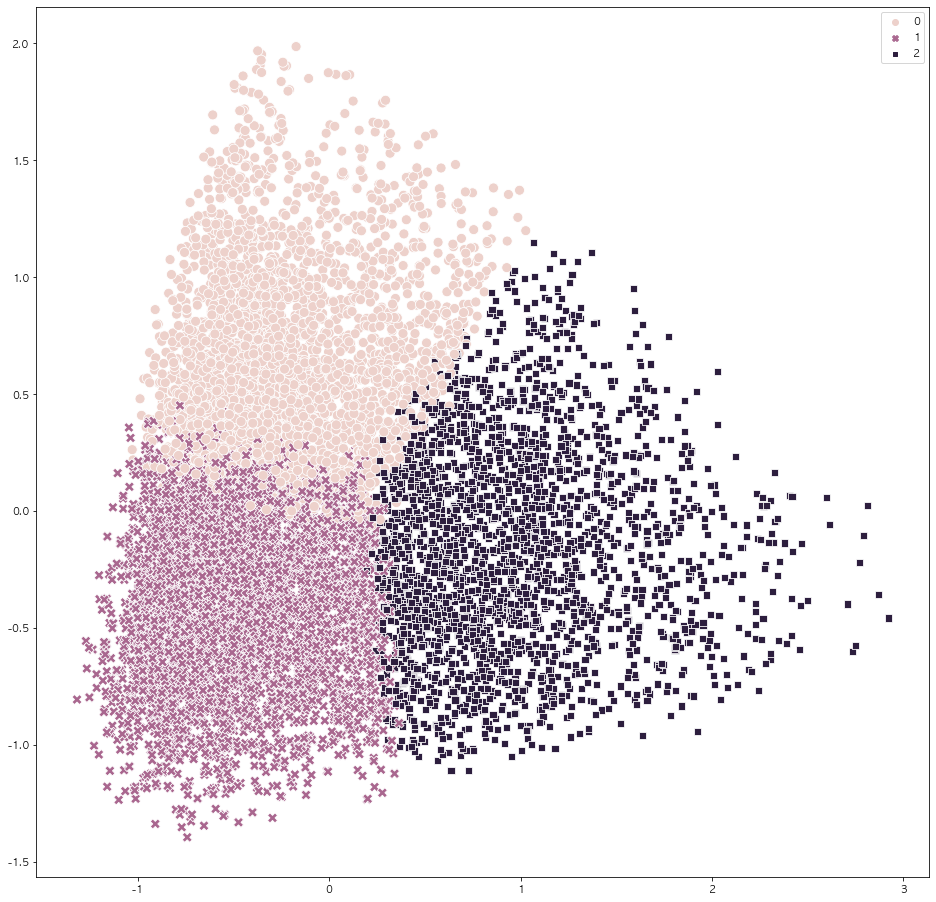

In [217]:
# 군집별 유저 시각화
fig = plt.figure(figsize = (16, 16))
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(
    pca_vec[:,0],
    pca_vec[:,1],
    s=100,
    hue= model.cluster,
    style= model.cluster
    )

plt.show()

# 유저 군집마다 순위별로 어떤 관심사를 가지고 있는지 시각화를 통해 파악

In [218]:
# test_li 데이터셋을 데이터프레임으로 변형해 전체 그룹 데이터프레임 생성 
group = pd.DataFrame(test_li, columns = ['user_id', 'preferences'])
group

,user_id,preferences
0,0,"[13, 9, 24, 5]"
1,1,"[23, 21, 10, 7]"
2,2,"[20, 15, 10, 21]"
3,3,"[8, 9, 2, 20]"
4,4,"[19, 18, 7, 9]"
...,...,...
9995,9995,"[24, 5, 16, 2]"
9996,9996,"[17, 18, 2, 12]"
9997,9997,"[21, 7, 17, 9]"
9998,9998,"[5, 1, 22, 14]"


In [219]:
#관심사 리스트(한국어)
preferences_ko = [
    '여행', '낚시', '등산',
    '자전거', '운동', '골프',
    '반려동물', '식물', '종교',
    '맛집', '와인', '술',
    '영화', '사진', '미술',
    '노래', '음악', '악기',
    '책', '패션', '뷰티',
    '투자', '인테리어', '결혼']

In [220]:
# 관심사 ID와 관심사 단어 연결 dict 생성 
pref_dict = {f'{i+1}':v for i,v in enumerate(preferences_ko)}
pref_dict

{'1': '여행',
 '2': '낚시',
 '3': '등산',
 '4': '자전거',
 '5': '운동',
 '6': '골프',
 '7': '반려동물',
 '8': '식물',
 '9': '종교',
 '10': '맛집',
 '11': '와인',
 '12': '술',
 '13': '영화',
 '14': '사진',
 '15': '미술',
 '16': '노래',
 '17': '음악',
 '18': '악기',
 '19': '책',
 '20': '패션',
 '21': '뷰티',
 '22': '투자',
 '23': '인테리어',
 '24': '결혼'}

In [221]:
# 관심사 ID를 단어로 변환 
def to_vocab(preferences):
    for i in range(4):
        preferences[i] = pref_dict[preferences[i]]
    return preferences

# 'preferences' 컬럼에 to_vocab 함수 적용
group['preferences'].apply(to_vocab)
group

,user_id,preferences
0,0,"[영화, 종교, 결혼, 운동]"
1,1,"[인테리어, 뷰티, 맛집, 반려동물]"
2,2,"[패션, 미술, 맛집, 뷰티]"
3,3,"[식물, 종교, 낚시, 패션]"
4,4,"[책, 악기, 반려동물, 종교]"
...,...,...
9995,9995,"[결혼, 운동, 노래, 낚시]"
9996,9996,"[음악, 악기, 낚시, 술]"
9997,9997,"[뷰티, 반려동물, 음악, 종교]"
9998,9998,"[운동, 여행, 투자, 사진]"


## 0군집 유저

In [222]:
# 0군집 유저 
group0 = group[model.cluster == 0]

In [223]:
# 1순위 관심사 
prefer1 = [i[0] for i in group0['preferences']]
group0['1순위'] = prefer1
print('<1순위 관심사>')
print(group0['1순위'].value_counts())

<1순위 관심사>
맛집      400
와인      399
식물      366
술       347
반려동물    226
투자      153
낚시      127
책       124
여행      114
패션      104
인테리어    103
운동      103
종교       90
결혼       87
뷰티       83
영화       59
노래       49
악기       40
사진       37
음악       36
미술       33
골프       18
Name: 1순위, dtype: int64


In [224]:
# 2순위 관심사 
prefer2 = [i[1] for i in group0['preferences']]
group0['2순위'] = prefer2
print('<2순위 관심사>')
print(group0['2순위'].value_counts())

<2순위 관심사>
식물      321
술       300
맛집      294
와인      291
반려동물    171
낚시      142
투자      122
종교      117
여행      115
책       111
영화      107
운동      106
뷰티       97
결혼       96
인테리어     93
패션       93
악기       93
골프       84
음악       80
미술       76
사진       70
노래       67
자전거      27
등산       25
Name: 2순위, dtype: int64


In [225]:
# 3순위 관심사 
prefer3 = [i[2] for i in group0['preferences']]
group0['3순위'] = prefer3
print('<3순위 관심사>')
print(group0['3순위'].value_counts())

<3순위 관심사>
와인      198
식물      186
낚시      184
술       183
맛집      182
반려동물    156
결혼      156
투자      134
종교      132
골프      125
인테리어    124
운동      120
책       116
악기      115
뷰티      115
패션      112
여행      111
음악      105
사진       99
영화       95
노래       95
미술       87
자전거      84
등산       84
Name: 3순위, dtype: int64


In [226]:
# 4순위 관심사 
prefer4 = [i[3] for i in group0['preferences']]
group0['4순위'] = prefer4
print('<4순위 관심사>')
print(group0['4순위'].value_counts())

<4순위 관심사>
식물      163
맛집      155
와인      143
결혼      142
골프      140
인테리어    133
반려동물    132
낚시      132
등산      131
종교      131
사진      130
패션      129
책       128
영화      127
뷰티      126
여행      125
술       124
자전거     123
음악      118
미술      115
악기      113
투자      113
노래      113
운동      112
Name: 4순위, dtype: int64


In [227]:
# 관심사 분포 시각화를 위해 관심사 개수 카운트 
def val_cnt(df): 
    # 순위별로 관심사 value_counts - 가나다 순으로 정렬 
    df_prefer1_cnt = pd.DataFrame(df['1순위'].value_counts()).sort_index()
    df_prefer2_cnt = pd.DataFrame(df['2순위'].value_counts()).sort_index()
    df_prefer3_cnt = pd.DataFrame(df['3순위'].value_counts()).sort_index()
    df_prefer4_cnt = pd.DataFrame(df['4순위'].value_counts()).sort_index()
    # 순위별로 관심사 value_counts한 df를 관심사 가나다 순으로 하나로 합치기 
    df_concat = pd.concat([df_prefer2_cnt, df_prefer3_cnt, df_prefer4_cnt, df_prefer1_cnt], axis=1)
    # 컬럼 순서 변경 - 1순위, 2순위, 3순위, 4순위
    df_concat = df_concat[['1순위', '2순위', '3순위', '4순위']]
    # 인덱스 reset 후 '관심사'로 컬럼명 변경 
    final_df = df_concat.reset_index(drop=False)
    final_df.rename(columns={'index':'관심사'}, inplace=True)

    # 결측치 0으로 대체
    final_df.fillna(0,inplace=True)
    # '1순위' 컬럼 데이터타입 변경 float -> int 
    final_df = final_df.astype({'1순위':'int'})

    # preferences_ko 순으로 정렬하기 위한 딕셔너리 생성
    sorterIndex = dict(zip(preferences_ko, range(len(preferences_ko))))
    # 해당 딕셔너리를 이용해 정렬을 위한 'sorter' 컬럼 생성
    df_sort = final_df
    df_sort['sorter'] = df_sort['관심사'].map(sorterIndex)
    # 'sorter' 컬럼을 기준으로 정렬
    df_sort.sort_values('sorter',inplace=True)
    # 'sorter' 컬럼 삭제
    df_sort.drop('sorter', 1, inplace=True)
    # 인덱스 reset 
    df_sort.reset_index(drop=True, inplace=True)

    return df_sort

In [228]:
# 시각화를 위해 tidy 형태로 변환 
def to_tidy(df): 
    df_tidy = pd.melt(df, id_vars=['관심사'], value_vars=['1순위', '2순위', '3순위', '4순위'],
                      var_name='순위', value_name='count')
    return df_tidy  

In [229]:
# val_cnt 함수 적용
g0_prefer_cnt = val_cnt(group0)
g0_prefer_cnt 

,관심사,1순위,2순위,3순위,4순위
0,여행,114,115,111,125
1,낚시,127,142,184,132
2,등산,0,25,84,131
3,자전거,0,27,84,123
4,운동,103,106,120,112
5,골프,18,84,125,140
6,반려동물,226,171,156,132
7,식물,366,321,186,163
8,종교,90,117,132,131
9,맛집,400,294,182,155


In [230]:
# to_tidy 함수 적용 
g0_tidy = to_tidy(g0_prefer_cnt)
g0_tidy 

,관심사,순위,count
0,여행,1순위,114
1,낚시,1순위,127
2,등산,1순위,0
3,자전거,1순위,0
4,운동,1순위,103
...,...,...,...
91,패션,4순위,129
92,뷰티,4순위,126
93,투자,4순위,113
94,인테리어,4순위,133


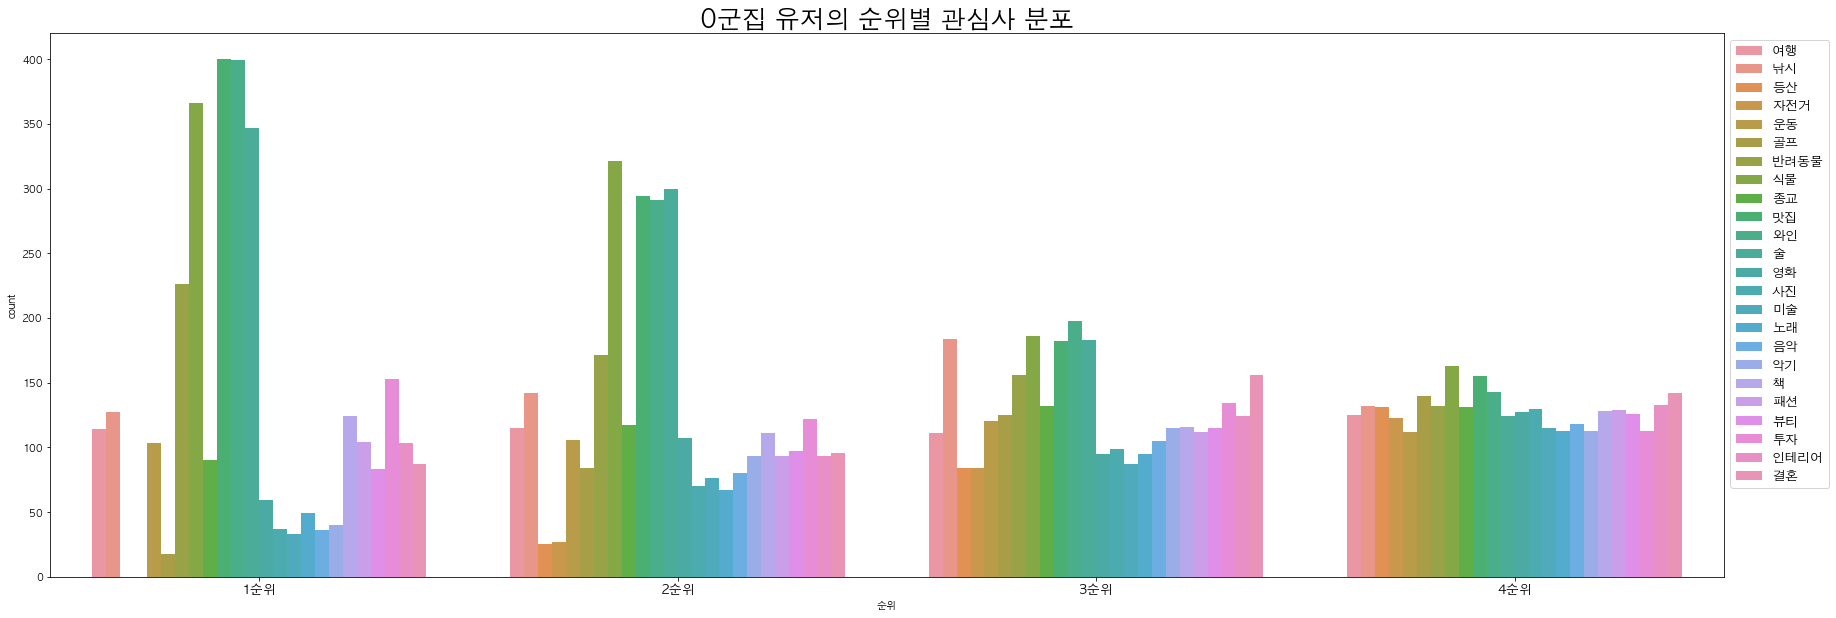

In [231]:
# 0군집 유저의 순위별 관심사 분포
plt.figure(figsize=(30, 10))
sns.barplot(data=g0_tidy, x='순위', y='count', hue='관심사')
plt.title("0군집 유저의 순위별 관심사 분포", loc='center', fontsize=25)
plt.xticks(fontsize=13)
plt.legend(fontsize=13, bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

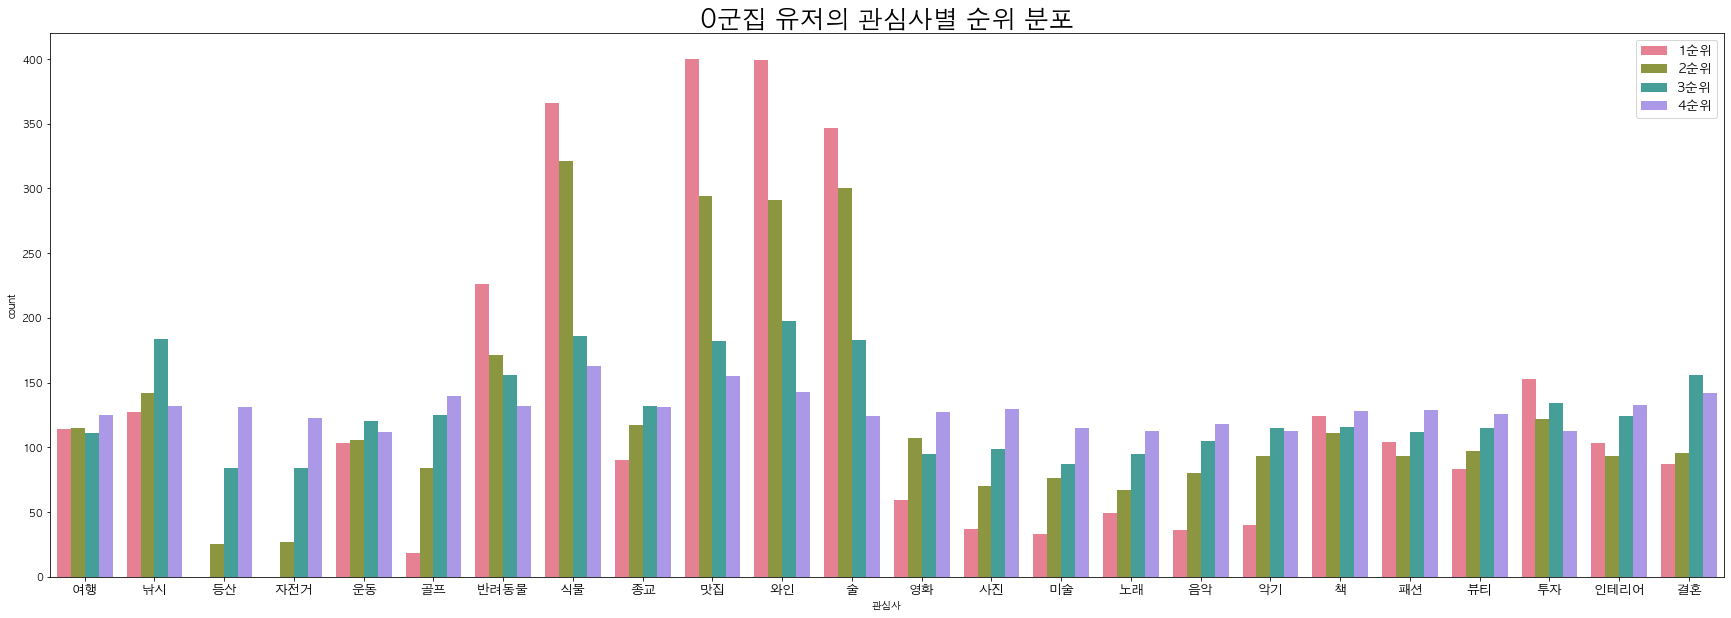

In [232]:
# 0군집 유저의 관심사별 순위 분포
plt.figure(figsize=(30, 10))
sns.barplot(data=g0_tidy, x='관심사', y='count', hue='순위', palette='husl')
plt.title("0군집 유저의 관심사별 순위 분포", loc='center', fontsize=25)
plt.xticks(fontsize=13)
plt.legend(fontsize=13)
plt.show()

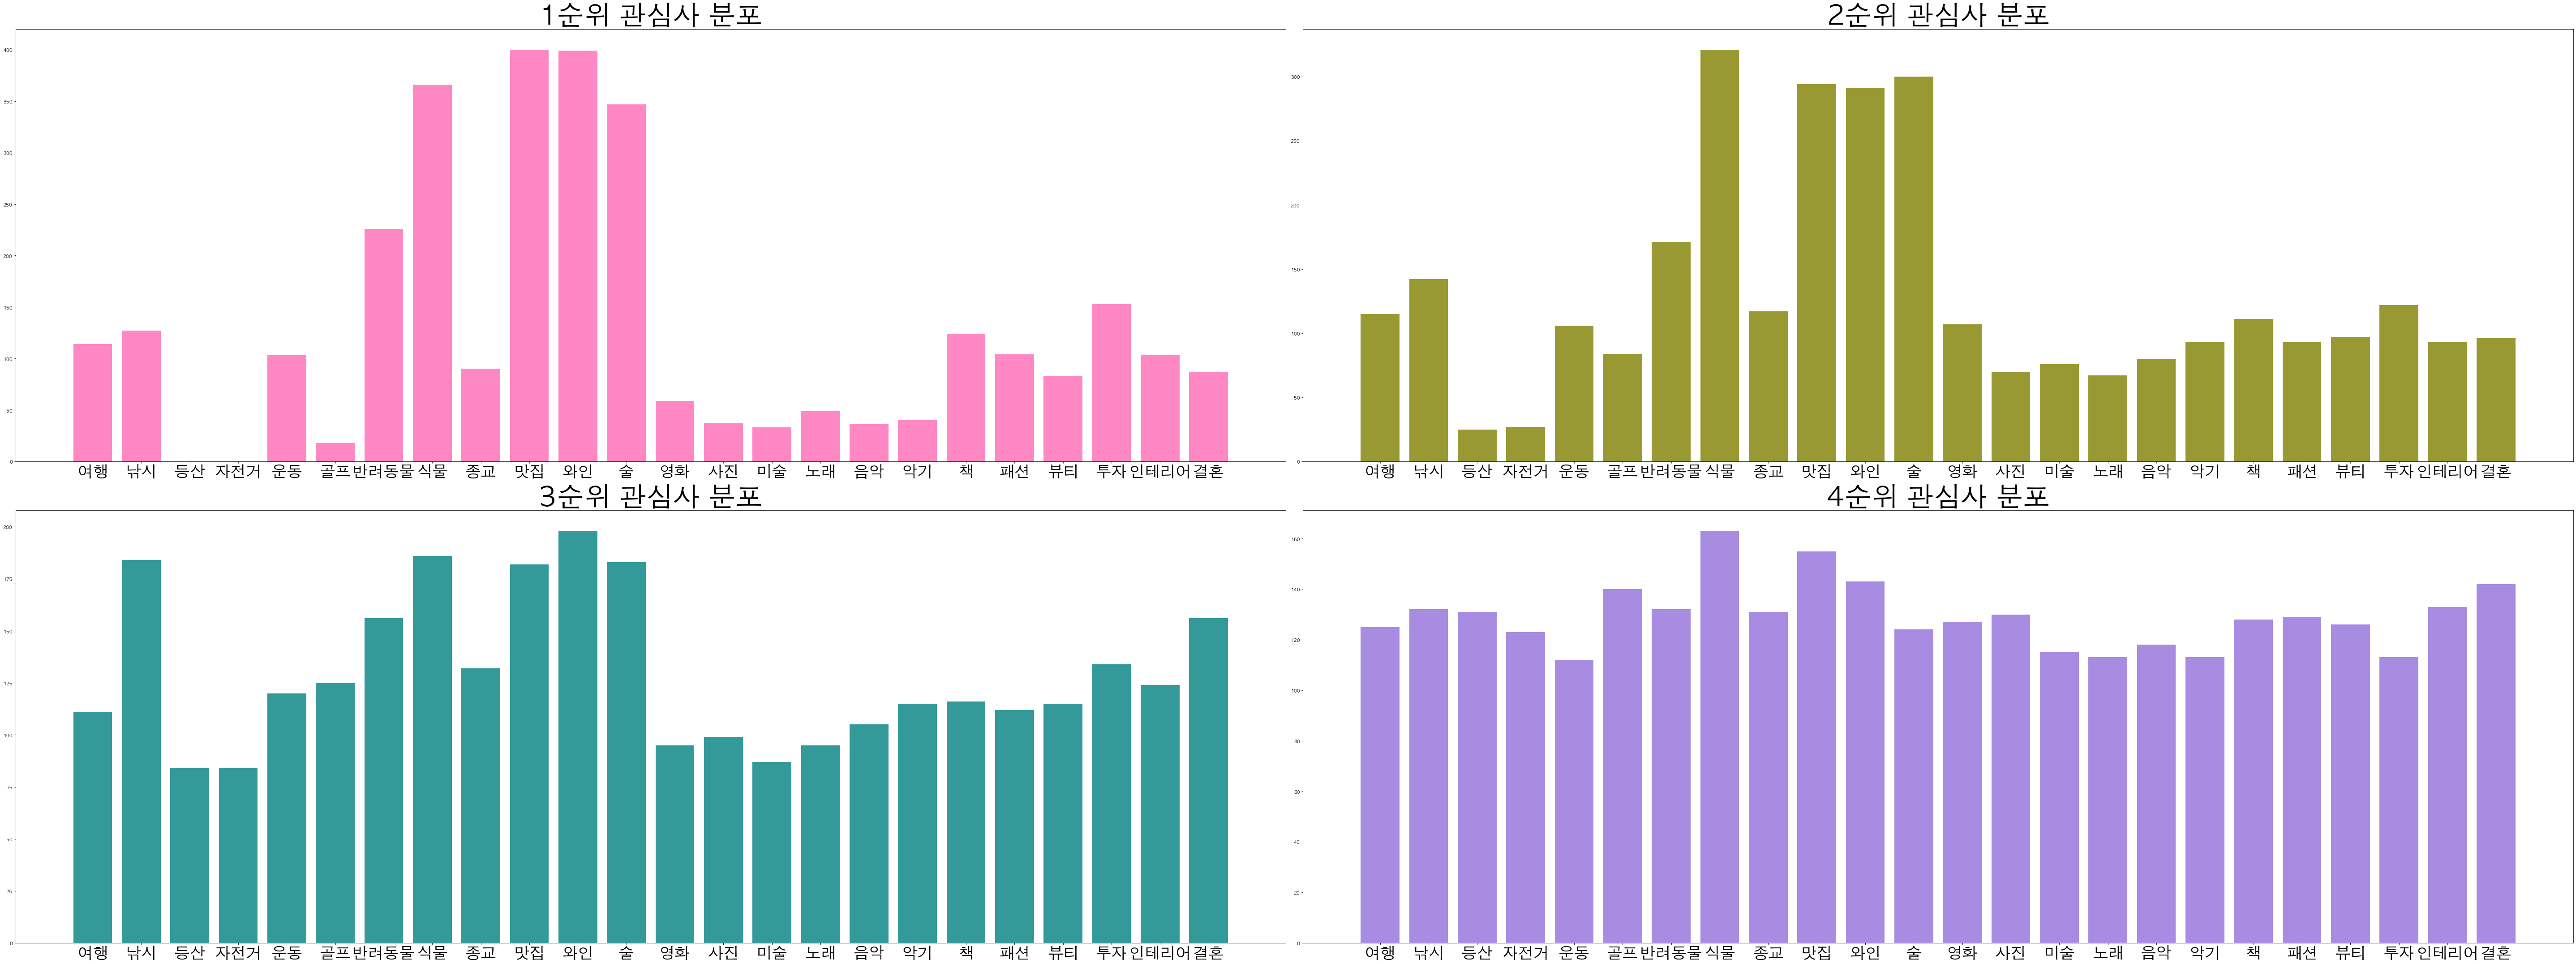

In [233]:
# 순위별 관심사 분포 
rnk = ['1순위', '2순위', '3순위', '4순위']

plt.figure(figsize=(80,30)) 
colors = ['white', 'hotpink', 'olive', 'teal', 'mediumpurple']
n=1
for r_ in rnk:
    d_ = g0_tidy[(g0_tidy['순위']== r_)]
    plt.subplot(2,2,n) 
    plt.title("%s 관심사 분포" % r_, fontsize=60)
    plt.bar(d_["관심사"], d_["count"], alpha=0.8, color=colors[n])
    plt.xticks(rotation=360, fontsize=35)
    n+=1
plt.tight_layout()  
plt.show()

## 1군집 유저 

In [234]:
# 1군집 유저 
group1 = group[model.cluster == 1]

In [235]:
# 1순위 관심사 
prefer1 = [i[0] for i in group1['preferences']]
group1['1순위'] = prefer1
print('<1순위 관심사>')
print(group1['1순위'].value_counts())

<1순위 관심사>
악기      358
음악      353
미술      334
노래      308
사진      288
종교      273
영화      270
패션      258
결혼      256
책       255
뷰티      243
인테리어    228
투자      209
운동      201
여행      197
반려동물    106
낚시       31
골프       14
식물        2
와인        1
Name: 1순위, dtype: int64


In [236]:
# 2순위 관심사 
prefer2 = [i[1] for i in group1['preferences']]
group1['2순위'] = prefer2
print('<2순위 관심사>')
print(group1['2순위'].value_counts())

<2순위 관심사>
음악      279
미술      269
사진      265
악기      253
종교      250
결혼      246
영화      245
노래      239
패션      234
인테리어    227
뷰티      221
운동      220
책       215
투자      201
여행      194
반려동물    155
낚시      123
골프      114
맛집       63
와인       55
식물       52
술        50
자전거      12
등산        3
Name: 2순위, dtype: int64


In [237]:
# 3순위 관심사 
prefer3 = [i[2] for i in group1['preferences']]
group1['3순위'] = prefer3
print('<3순위 관심사>')
print(group1['3순위'].value_counts())

<3순위 관심사>
음악      230
결혼      220
종교      215
운동      211
패션      211
사진      210
뷰티      208
노래      206
미술      197
인테리어    196
악기      194
영화      187
투자      181
여행      181
책       177
반려동물    165
골프      164
낚시      135
식물      123
맛집      122
와인      120
술       118
자전거     116
등산       98
Name: 3순위, dtype: int64


In [238]:
# 4순위 관심사 
prefer4 = [i[3] for i in group1['preferences']]
group1['4순위'] = prefer4
print('<4순위 관심사>')
print(group1['4순위'].value_counts())

<4순위 관심사>
악기      212
맛집      200
운동      198
음악      195
낚시      187
책       186
사진      182
결혼      181
노래      180
투자      177
반려동물    176
와인      174
영화      170
자전거     170
패션      168
술       168
미술      168
종교      166
골프      165
뷰티      164
여행      163
인테리어    151
등산      147
식물      137
Name: 4순위, dtype: int64


In [239]:
# val_cnt 함수 적용
g1_prefer_cnt = val_cnt(group1)
g1_prefer_cnt

,관심사,1순위,2순위,3순위,4순위
0,여행,197,194,181,163
1,낚시,31,123,135,187
2,등산,0,3,98,147
3,자전거,0,12,116,170
4,운동,201,220,211,198
5,골프,14,114,164,165
6,반려동물,106,155,165,176
7,식물,2,52,123,137
8,종교,273,250,215,166
9,맛집,0,63,122,200


In [240]:
# to_tidy 함수 적용 
g1_tidy = to_tidy(g1_prefer_cnt)
g1_tidy 

,관심사,순위,count
0,여행,1순위,197
1,낚시,1순위,31
2,등산,1순위,0
3,자전거,1순위,0
4,운동,1순위,201
...,...,...,...
91,패션,4순위,168
92,뷰티,4순위,164
93,투자,4순위,177
94,인테리어,4순위,151


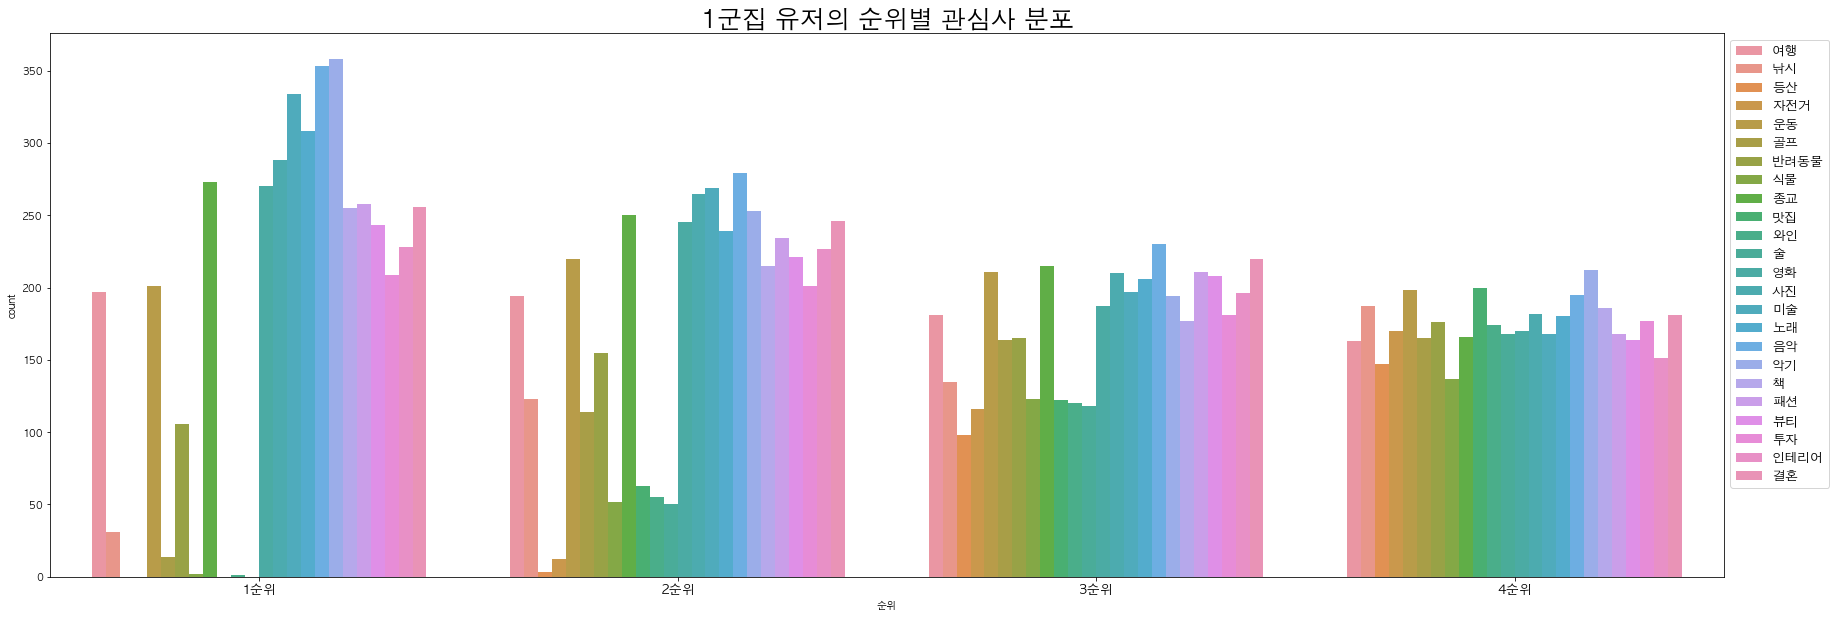

In [241]:
# 1군집 유저의 순위별 관심사 분포
plt.figure(figsize=(30, 10))
sns.barplot(data=g1_tidy, x='순위', y='count', hue='관심사')
plt.title("1군집 유저의 순위별 관심사 분포", loc='center', fontsize=25)
plt.xticks(fontsize=13)
plt.legend(fontsize=13, bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

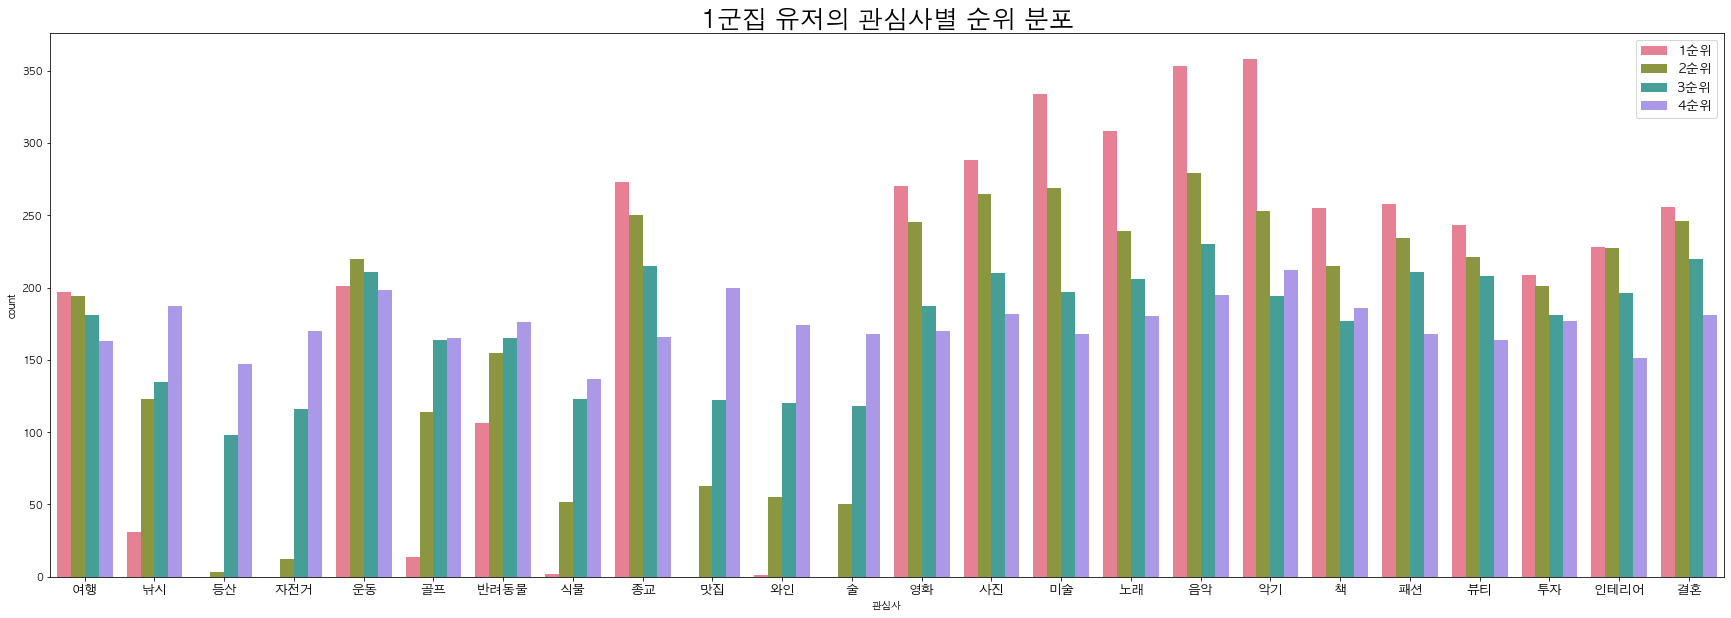

In [242]:
# 1군집 유저의 관심사별 순위 분포
plt.figure(figsize=(30, 10))
sns.barplot(data=g1_tidy, x='관심사', y='count', hue='순위', palette='husl')
plt.title("1군집 유저의 관심사별 순위 분포", loc='center', fontsize=25)
plt.xticks(fontsize=13)
plt.legend(fontsize=13)
plt.show()

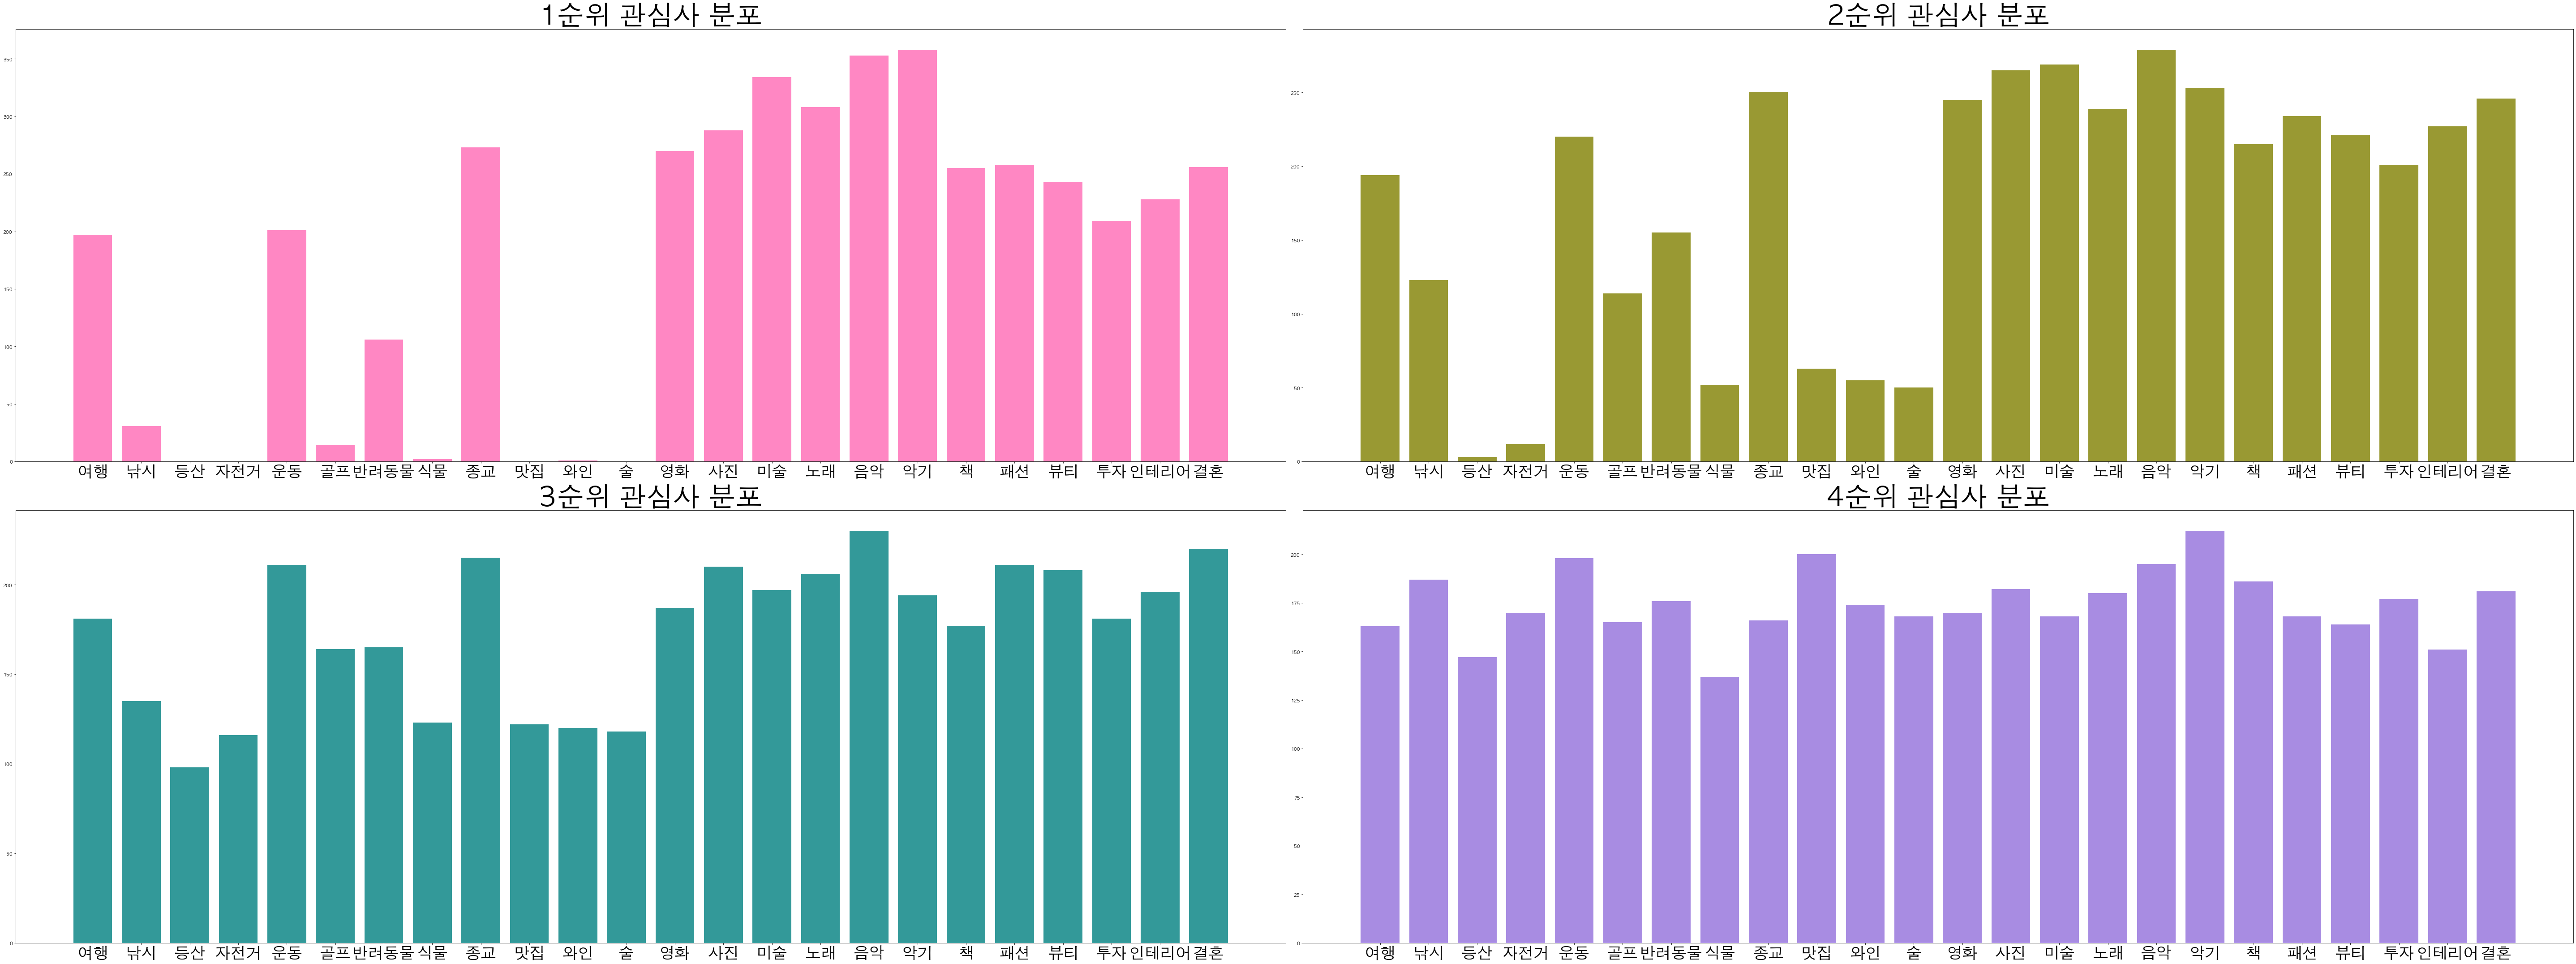

In [243]:
# 순위별 관심사 분포 
rnk = ['1순위', '2순위', '3순위', '4순위']

plt.figure(figsize=(80,30)) 
colors = ['white', 'hotpink', 'olive', 'teal', 'mediumpurple']
n=1
for r_ in rnk:
    d_ = g1_tidy[(g1_tidy['순위']== r_)]
    plt.subplot(2,2,n) 
    plt.title("%s 관심사 분포" % r_, fontsize=60)
    plt.bar(d_["관심사"], d_["count"], alpha=0.8, color=colors[n])
    plt.xticks(rotation=360, fontsize=35)
    n+=1
plt.tight_layout()  
plt.show()

## 2군집 유저

In [244]:
# 2군집 유저 
group2 = group[model.cluster == 2]

In [245]:
# 1순위 관심사 
prefer1 = [i[0] for i in group2['preferences']]
group2['1순위'] = prefer1
print('<1순위 관심사>')
print(group2['1순위'].value_counts())

<1순위 관심사>
등산      454
자전거     432
골프      372
낚시      254
운동      117
여행      116
반려동물     95
사진       80
인테리어     75
책        71
노래       70
뷰티       67
투자       67
영화       64
미술       47
음악       47
종교       46
결혼       45
패션       41
식물       35
술        33
맛집       31
악기       30
와인       28
Name: 1순위, dtype: int64


In [246]:
# 2순위 관심사 
prefer2 = [i[1] for i in group2['preferences']]
group2['2순위'] = prefer2
print('<2순위 관심사>')
print(group2['2순위'].value_counts())

<2순위 관심사>
등산      395
자전거     393
골프      238
낚시      173
여행      104
사진      101
인테리어     94
운동       94
결혼       87
노래       85
종교       79
와인       79
영화       79
반려동물     77
뷰티       75
미술       74
투자       74
맛집       69
음악       62
술        60
식물       59
책        58
패션       56
악기       52
Name: 2순위, dtype: int64


In [247]:
# 3순위 관심사 
prefer3 = [i[2] for i in group2['preferences']]
group2['3순위'] = prefer3
print('<3순위 관심사>')
print(group2['3순위'].value_counts())

<3순위 관심사>
등산      222
자전거     196
골프      146
운동      134
낚시      130
사진      128
여행      127
책       115
반려동물    110
종교      109
음악      107
뷰티      106
인테리어    103
술       101
노래      100
영화       98
미술       95
와인       95
맛집       92
패션       90
악기       84
식물       84
투자       81
결혼       64
Name: 3순위, dtype: int64


In [248]:
# 4순위 관심사 
prefer4 = [i[3] for i in group2['preferences']]
group2['4순위'] = prefer4 
print('<4순위 관심사>')
print(group2['4순위'].value_counts())

<4순위 관심사>
골프      131
자전거     128
투자      125
운동      124
음악      124
책       122
노래      120
등산      118
영화      117
와인      116
맛집      115
결혼      115
식물      113
종교      109
악기      109
패션      108
인테리어    107
술       107
미술      105
여행      105
낚시      101
뷰티      101
사진       99
반려동물     98
Name: 4순위, dtype: int64


In [249]:
# val_cnt 함수 적용
g2_prefer_cnt = val_cnt(group2)
g2_prefer_cnt

,관심사,1순위,2순위,3순위,4순위
0,여행,116,104,127,105
1,낚시,254,173,130,101
2,등산,454,395,222,118
3,자전거,432,393,196,128
4,운동,117,94,134,124
5,골프,372,238,146,131
6,반려동물,95,77,110,98
7,식물,35,59,84,113
8,종교,46,79,109,109
9,맛집,31,69,92,115


In [250]:
# to_tidy 함수 적용 
g2_tidy = to_tidy(g2_prefer_cnt)
g2_tidy 

,관심사,순위,count
0,여행,1순위,116
1,낚시,1순위,254
2,등산,1순위,454
3,자전거,1순위,432
4,운동,1순위,117
...,...,...,...
91,패션,4순위,108
92,뷰티,4순위,101
93,투자,4순위,125
94,인테리어,4순위,107


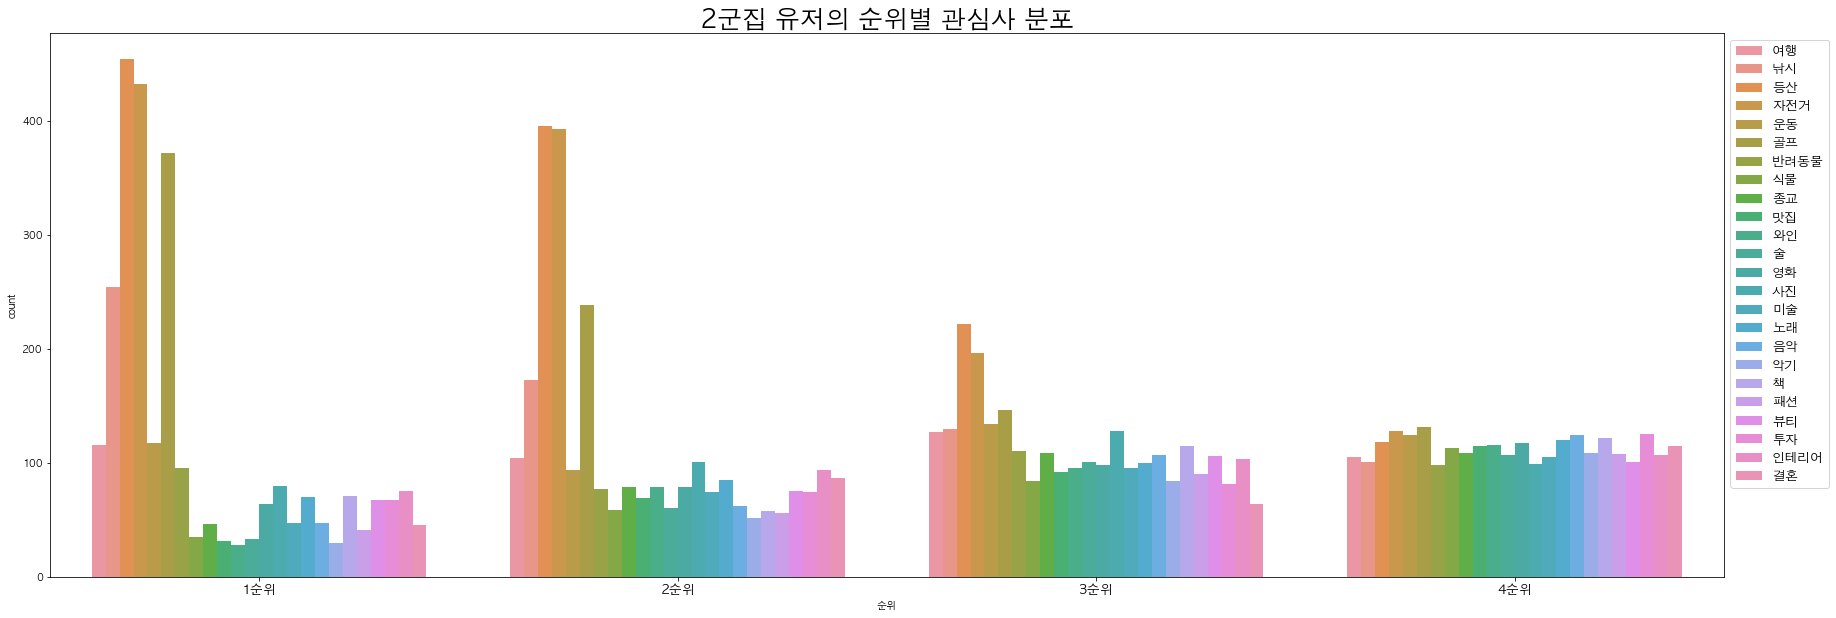

In [251]:
# 2군집 유저의 순위별 관심사 분포
plt.figure(figsize=(30, 10))
sns.barplot(data=g2_tidy, x='순위', y='count', hue='관심사')
plt.title("2군집 유저의 순위별 관심사 분포", loc='center', fontsize=25)
plt.xticks(fontsize=13)
plt.legend(fontsize=13, bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

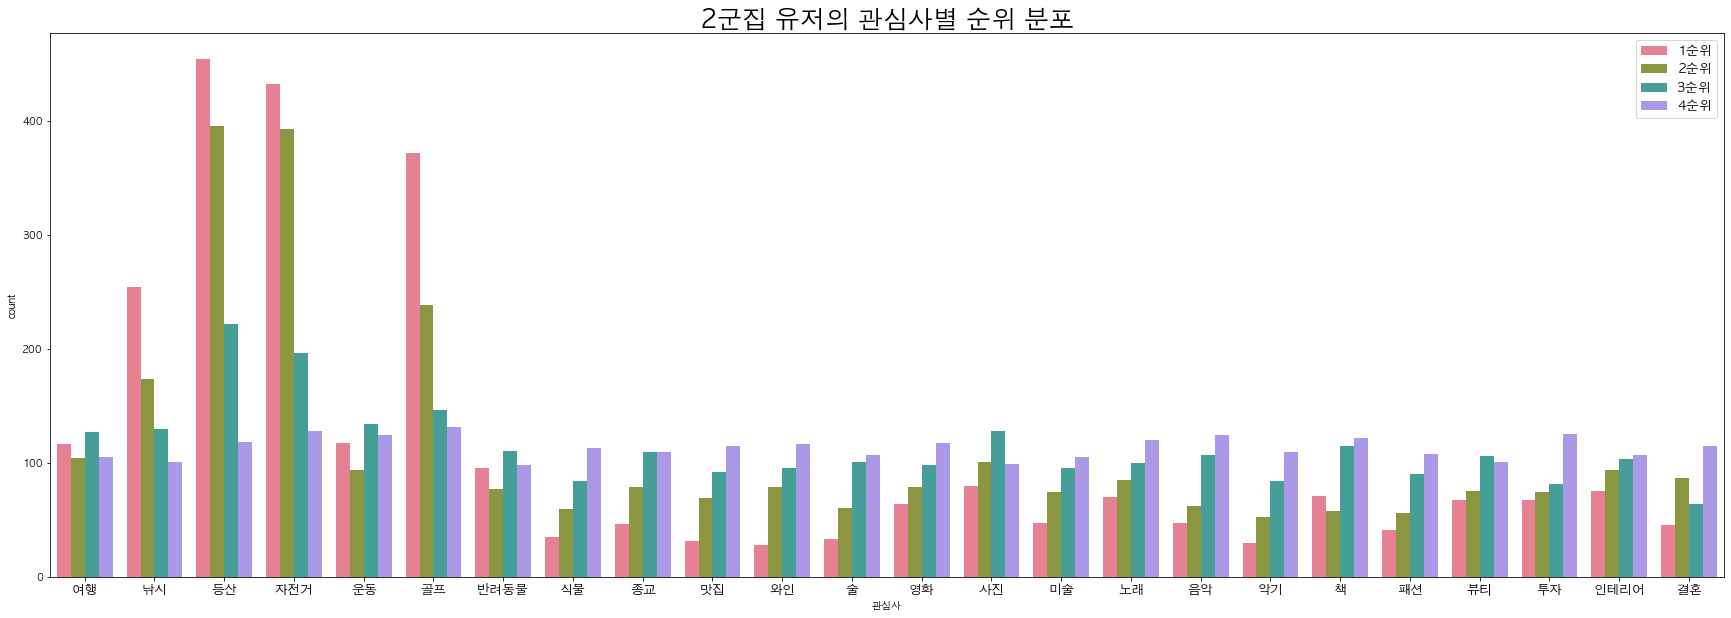

In [252]:
# 2군집 유저의 관심사별 순위 분포
plt.figure(figsize=(30, 10))
sns.barplot(data=g2_tidy, x='관심사', y='count', hue='순위', palette='husl')
plt.title("2군집 유저의 관심사별 순위 분포", loc='center', fontsize=25)
plt.xticks(fontsize=13)
plt.legend(fontsize=13)
plt.show()

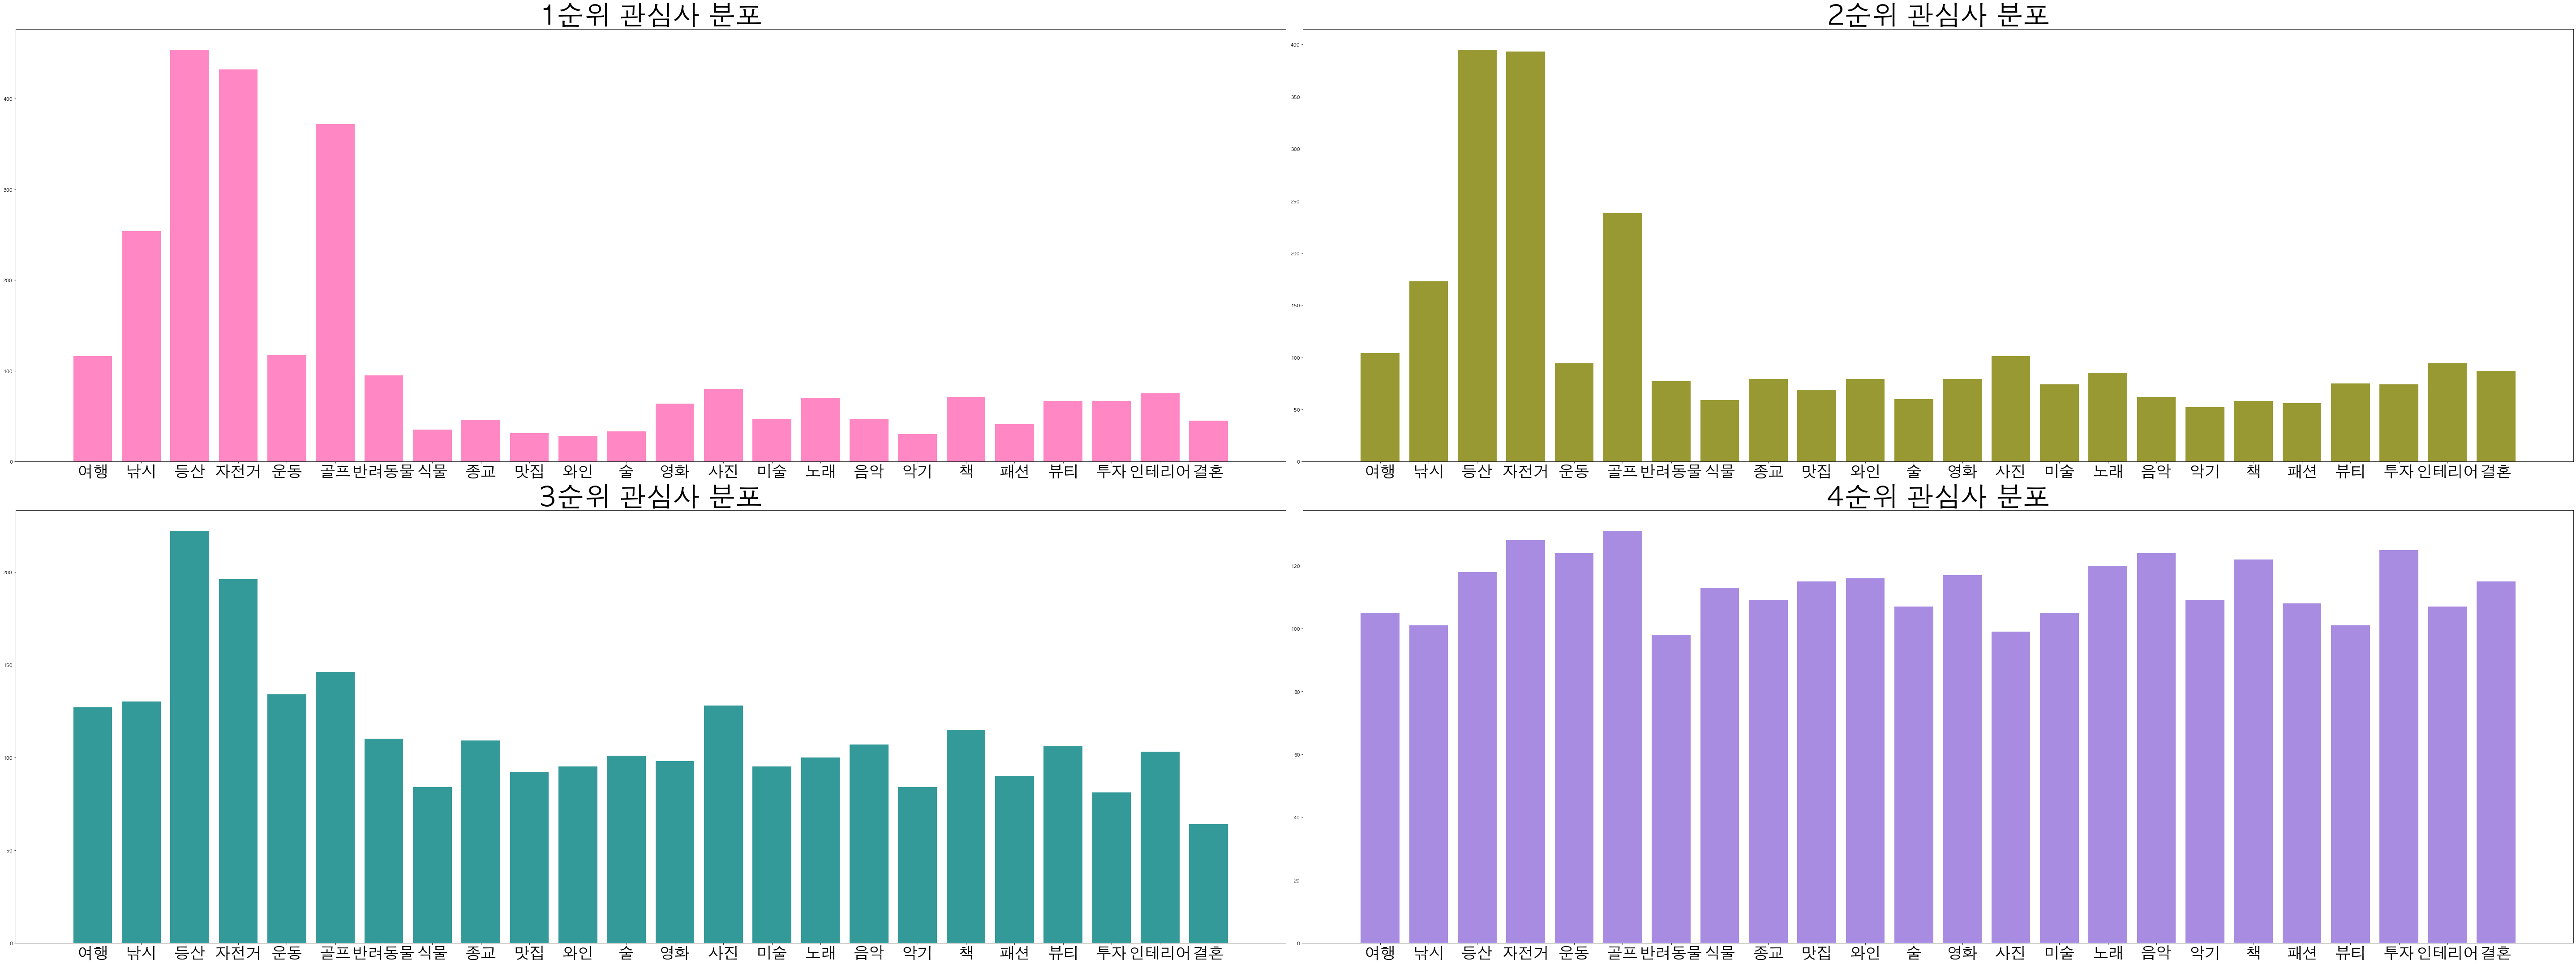

In [253]:
# 순위별 관심사 분포 
rnk = ['1순위', '2순위', '3순위', '4순위']

plt.figure(figsize=(80,30)) 
colors = ['white', 'hotpink', 'olive', 'teal', 'mediumpurple']
n=1
for r_ in rnk:
    d_ = g2_tidy[(g2_tidy['순위']== r_)]
    plt.subplot(2,2,n) 
    plt.title("%s 관심사 분포" % r_, fontsize=60)
    plt.bar(d_["관심사"], d_["count"], alpha=0.8, color=colors[n])
    plt.xticks(rotation=360, fontsize=35)
    n+=1
plt.tight_layout()  
plt.show()